In [1]:
%matplotlib inline

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

from IPython.display import Math, Latex # for latex questions

from IPython.core.display import Image # for displaying images

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import seaborn as sns

import scipy.stats

sns.set(color_codes=True)

sns.set(rc={'figure.figsize':(5,5)})

df = pd.read_csv('nyc-rolling-sales.csv')

print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


# Preprocessing Data

In [2]:
df.head(5)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [3]:
df.tail(5)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00
84547,8413,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,...,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


In [4]:
df.shape

(84548, 22)

In [5]:
df.dtypes

Unnamed: 0                         int64
BOROUGH                            int64
NEIGHBORHOOD                      object
BUILDING CLASS CATEGORY           object
TAX CLASS AT PRESENT              object
BLOCK                              int64
LOT                                int64
EASE-MENT                         object
BUILDING CLASS AT PRESENT         object
ADDRESS                           object
APARTMENT NUMBER                  object
ZIP CODE                           int64
RESIDENTIAL UNITS                  int64
COMMERCIAL UNITS                   int64
TOTAL UNITS                        int64
LAND SQUARE FEET                  object
GROSS SQUARE FEET                 object
YEAR BUILT                         int64
TAX CLASS AT TIME OF SALE          int64
BUILDING CLASS AT TIME OF SALE    object
SALE PRICE                        object
SALE DATE                         object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [7]:
print('Column name')
for col in df.columns:
    if df[col].dtype=='object':
        print(col, df[col].nunique())

Column name
NEIGHBORHOOD 254
BUILDING CLASS CATEGORY 47
TAX CLASS AT PRESENT 11
EASE-MENT 1
BUILDING CLASS AT PRESENT 167
ADDRESS 67563
APARTMENT NUMBER 3989
LAND SQUARE FEET 6062
GROSS SQUARE FEET 5691
BUILDING CLASS AT TIME OF SALE 166
SALE PRICE 10008
SALE DATE 364


In [8]:
numer = ['LAND SQUARE FEET','GROSS SQUARE FEET', 'SALE PRICE', 'BOROUGH']
for col in numer: # coerce for missing values
    df[col] = pd.to_numeric(df[col], errors='coerce')

categ = ['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT', 'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE']
for col in categ:
    df[col] = df[col].astype('category')

df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], errors='coerce')

In [9]:
missing = df.isnull().sum()/len(df)*100

print(pd.DataFrame([missing[missing>0],pd.Series(df.isnull().sum()[df.isnull().sum()>1000])], index=['percent missing','how many missing']))

                  LAND SQUARE FEET  GROSS SQUARE FEET   SALE PRICE
percent missing          31.049818          32.658372     17.22217
how many missing      26252.000000       27612.000000  14561.00000


In [10]:
print(df[(df['LAND SQUARE FEET'].isnull()) & (df['GROSS SQUARE FEET'].notnull())].shape)
print(df[(df['LAND SQUARE FEET'].notnull()) & (df['GROSS SQUARE FEET'].isnull())].shape)

(6, 22)
(1366, 22)


In [11]:
df['LAND SQUARE FEET'] = df['LAND SQUARE FEET'].mask((df['LAND SQUARE FEET'].isnull()) & (df['GROSS SQUARE FEET'].notnull()), df['GROSS SQUARE FEET'])
df['GROSS SQUARE FEET'] = df['GROSS SQUARE FEET'].mask((df['LAND SQUARE FEET'].notnull()) & (df['GROSS SQUARE FEET'].isnull()), df['LAND SQUARE FEET'])

In [12]:
print(sum(df.duplicated()))

df[df.duplicated(keep=False)].sort_values(['NEIGHBORHOOD', 'ADDRESS']).head(10)

0


,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE


In [13]:
df.drop_duplicates(inplace=True)

print(sum(df.duplicated()))

0


In [14]:
df.drop(['Unnamed: 0', 'EASE-MENT'], axis=1, inplace=True)
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17


In [15]:
df['BOROUGH'].value_counts

<bound method IndexOpsMixin.value_counts of 0        1
1        1
2        1
3        1
4        1
        ..
84543    5
84544    5
84545    5
84546    5
84547    5
Name: BOROUGH, Length: 84548, dtype: int64>

In [16]:
# Mengubah jenis dan data beberapa kolom agar dapat dianalisis lebih lanjut

df['BOROUGH'] = df['BOROUGH'].astype(str)
df['BOROUGH'].replace({'1':'Manhattan', '2':'Bronx','3':'Brooklyn','4':'Queens','5':'Staten Island'},inplace=True)
df['SALE PRICE'] = df['SALE PRICE'].replace({' - ' : '0'})
df['SALE PRICE'] = df['SALE PRICE'].astype(float)
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'])
df['sale_month'] = df['SALE DATE'].dt.month_name()
df['sale_year'] = df['SALE DATE'].dt.year

In [17]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,...,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,sale_month,sale_year
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,...,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19,July,2017
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,...,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14,December,2016
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,...,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09,December,2016
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,...,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23,September,2016
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,...,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17,November,2016


# Exploratory Data Analysis

## Pada bagian ini, dicoba untuk menganalisis indikator Sales Price

### Descriptive : Mean, Median, Mode, Range, Standard Deviation, Variance

In [18]:
df['SALE PRICE'].describe()

count    6.998700e+04
mean     1.276456e+06
std      1.140526e+07
min      0.000000e+00
25%      2.250000e+05
50%      5.300000e+05
75%      9.500000e+05
max      2.210000e+09
Name: SALE PRICE, dtype: float64

In [19]:
mean_saleprice = df['SALE PRICE'].mean()
mean_saleprice

1276456.4977638705

### Confidence Interval of the Mean : Alpha 95% z score 1.96

In [20]:
se_saleprice = df['SALE PRICE'].std() / np.sqrt(df['SALE PRICE'].count())
print("Standard Error SALES PRICE :")
print(se_saleprice)

print("")

lcb = mean_saleprice - 1.96 * se_saleprice
ucb = mean_saleprice + 1.96 * se_saleprice

print("Lower Boundary:")
print(lcb)
print("")
print("Upper Boundary:")
print(ucb)

print("")
if mean_saleprice <= ucb and mean_saleprice >= lcb:
    print("true mean of Sale Price will fall between 1191957.3 and 1360955.6")
else:
    print("true mean of Sale Price will fall out of 1191957.3 and 1360955.6")

Standard Error SALES PRICE :
43111.81668983223

Lower Boundary:
1191957.3370517993

Upper Boundary:
1360955.6584759417

true mean of Sale Price will fall between 1191957.3 and 1360955.6


In [21]:
df['SALE PRICE'].mode()

0    0.0
dtype: float64

In [22]:
df['SALE PRICE'].var()

130079849507240.9

In [23]:
range_saleprice = df['SALE PRICE'].max() - df['SALE PRICE'].min()
range_saleprice

2210000000.0

In [24]:
np.amax(df['SALE PRICE']) - np.amin(df['SALE PRICE'])

2210000000.0

In [25]:
quartiles_price = df['SALE PRICE'].quantile([0.25,0.75])
rangequartile_price = quartiles_price[0.75] - quartiles_price[0.25]

outlier_saleprice = 1.5 * rangequartile_price
outlier_saleprice_boundary = quartiles_price[0.75]+outlier_saleprice
print(outlier_saleprice)
print(outlier_saleprice_boundary)

1087500.0
2037500.0


In [26]:
# dari descriptive statistics di atas terlihat bahwa  harga jual terendah adalah 0.
# harga jual 0 tersebut bukan berasal dari transaksi jual beli
# nilai maksimum dari harga jual adalah 2.210000e+09, jangan jauh dari batasan outlier
# perlu dilihat SALE PRICE tanpa nilai outlier (bawah dan atas)

/Users/ahmadiskandar/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


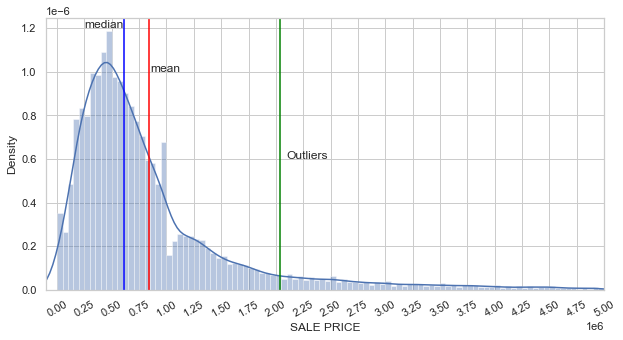

In [27]:
import matplotlib.ticker as ticker

sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
saleprice_wo_outlier = df[(df['SALE PRICE']>100) & (df['SALE PRICE'] < 5000000)]['SALE PRICE']
plotd = sns.distplot(saleprice_wo_outlier, kde=True, bins=100)

tick_spacing=250000 # set spacing for each tick
plotd.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plotd.set_xlim([-100000, 5000000]) # do not show negative values 
plt.xticks(rotation=30) # rotate x ticks by 30 degrees
plt.axvline(saleprice_wo_outlier.mean(), c='red')
plt.axvline(saleprice_wo_outlier.median(), c='blue')
plt.axvline(outlier_saleprice_boundary, c='green')
plt.text(250000,0.0000012, "median")
plt.text(850000,0.0000010, "mean")
plt.text(2100000,0.0000006, "Outliers")
plt.show()

### Normality Testing


In [28]:
# D'Agostinos's K^2 Test

from scipy.stats import normaltest

stat, p = normaltest(saleprice_wo_outlier)
print ('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Normal')
else:
    print('Probably not Normal')

stat=26981.331, p=0.000
Probably not Normal


#### Data SALE PRICE tidak memiliki distribusi normal

####

## Pada bagian ini, dicoba untuk menganalisis indikator LAND SQUARE FEET

In [29]:
df['LAND SQUARE FEET'].describe()

count    5.830200e+04
mean     3.944997e+03
std      4.198315e+04
min      0.000000e+00
25%      1.650000e+03
50%      2.325000e+03
75%      3.500000e+03
max      4.252327e+06
Name: LAND SQUARE FEET, dtype: float64

In [30]:
df['LAND SQUARE FEET'].mode()

0    0.0
dtype: float64

In [31]:
df['LAND SQUARE FEET'].var()

1762585181.3533657

In [32]:
np.amax(df['LAND SQUARE FEET']) - np.amin(df['LAND SQUARE FEET'])

4252327.0

In [33]:
quartiles_land = df['LAND SQUARE FEET'].quantile([0.25,0.75])
rangequartile_land = quartiles_land[0.75] - quartiles_land[0.25]

outlier_land = 1.5 * rangequartile_land
outlier_land_boundary = quartiles_land[0.75]+outlier_land
print(outlier_land)
print(outlier_land_boundary)

2775.0
6275.0


In [34]:
# dari descriptive statistics di atas terlihat bahwa LAND SQUARE FEET terendah adalah 0.
# perlu dilihat LAND SQUARE FEET tanpa nilai 0

## Pada bagian ini, dicoba untuk membandingkan antara Sales Price dan Land Square Feet

In [35]:
df3 = df[["LAND SQUARE FEET", "SALE PRICE"]].dropna()
df3

,LAND SQUARE FEET,SALE PRICE
0,1633.0,6625000.0
3,2272.0,3936272.0
4,2369.0,8000000.0
6,1750.0,3192840.0
9,4489.0,16232000.0
...,...,...
84543,2400.0,450000.0
84544,2498.0,550000.0
84545,4000.0,460000.0
84546,208033.0,11693337.0


In [36]:
df3.describe()

,LAND SQUARE FEET,SALE PRICE
count,4.880300e+04,4.880300e+04
mean,3.632166e+03,1.175081e+06
std,4.035743e+04,1.339785e+07
min,0.000000e+00,0.000000e+00
25%,1.438000e+03,8.605000e+04
50%,2.150000e+03,4.800000e+05
75%,3.100000e+03,8.300000e+05
max,4.252327e+06,2.210000e+09


In [37]:
df3.corr()

,LAND SQUARE FEET,SALE PRICE
LAND SQUARE FEET,1.000000,0.060332
SALE PRICE,0.060332,1.000000


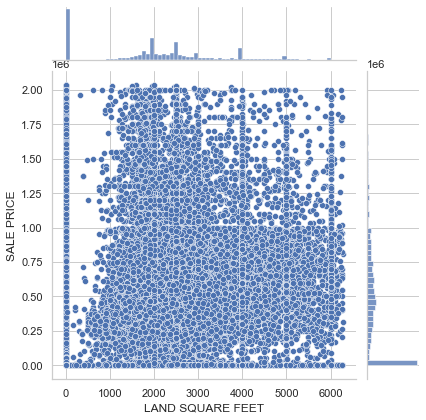

In [38]:
# melihat sebaran variabel dibawah outlier boundary

sns.jointplot(x='LAND SQUARE FEET', y='SALE PRICE', 
              data=df3[(df3['LAND SQUARE FEET']<=outlier_land_boundary) & (df3['SALE PRICE']<=outlier_saleprice_boundary)], kind='scatter')

In [39]:
df3[(df3['LAND SQUARE FEET']<=outlier_land_boundary)& (df3['SALE PRICE']<=outlier_saleprice_boundary)][['LAND SQUARE FEET','SALE PRICE']].corr()

,LAND SQUARE FEET,SALE PRICE
LAND SQUARE FEET,1.000000,0.086206
SALE PRICE,0.086206,1.000000


In [40]:
# Untuk data dibawah outlier boundary, korelasi kedua variabel sebesar 0.086 atau positif lemah
# nilai korelasi tersebut lebih besar dibandingkan dengan menggunakan keseluruhan data

# Dari plot diatas, juga terlihat terdapat nilai 0 untuk luas tanah
# Dari plot diatas, juga terlihat terdapat harga jual sebesar 0

In [41]:
print(df3[(df3['LAND SQUARE FEET'].isnull()) & (df3['SALE PRICE'].notnull())].shape)
print(df3[(df3['LAND SQUARE FEET'].notnull()) & (df3['SALE PRICE'].isnull())].shape)

(0, 2)
(0, 2)


In [42]:
# mengeluarkan luasan tanah bernilai 0 dan harga dibawah 10

df4 = df3[(df3['LAND SQUARE FEET']>0) &
          (df3['LAND SQUARE FEET']<=outlier_land_boundary) &
          (df3['SALE PRICE']>10) &
          (df3['SALE PRICE']<=outlier_saleprice_boundary)]
df4

,LAND SQUARE FEET,SALE PRICE
222,1566.0,1583840.0
223,1566.0,416790.0
224,1566.0,630370.0
277,4600.0,282000.0
1087,5017.0,93000.0
...,...,...
84537,4350.0,625000.0
84540,3325.0,509000.0
84543,2400.0,450000.0
84544,2498.0,550000.0


In [43]:
df4.describe()

,LAND SQUARE FEET,SALE PRICE
count,25770.000000,2.577000e+04
mean,2776.643772,6.563898e+05
std,1124.173399,3.749261e+05
min,33.000000,1.900000e+01
25%,2000.000000,4.080230e+05
50%,2500.000000,5.760000e+05
75%,3495.750000,8.350000e+05
max,6275.000000,2.037500e+06


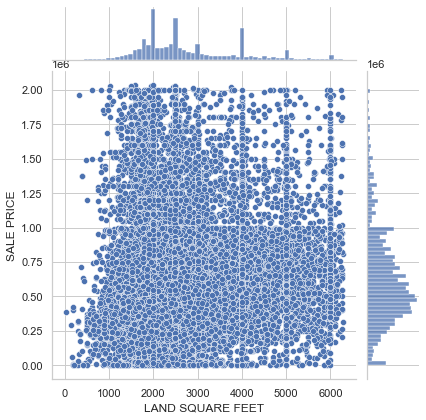

In [44]:
sns.jointplot(x='LAND SQUARE FEET', y='SALE PRICE', 
              data=df4, kind='scatter')

In [45]:
df4.corr()

,LAND SQUARE FEET,SALE PRICE
LAND SQUARE FEET,1.000000,0.064394
SALE PRICE,0.064394,1.000000


In [46]:
# untuk data 
    # Sale Price antara 10 dan batas outlier
    # Land Square Feet antara 1 dan batas outlier
# diperoleh korelasi sebesar 0.064
# lebih kecil dibandingkan dengan jika menggunakan data sale price dan land square feet
# mulai dari 0 sampai dengan batas outlier

# Hypothesis Testing

In [47]:
# Semakin besar luas tanah, semakin tinggi tingkat harga jual

# Interpretation:
    #  H0 : the two variables are independent
    #  H1 : there is a dependency between the variables

from scipy.stats import spearmanr

stat, p = spearmanr(df4)

print ('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Independent')
else:
    print('Probably Dependent')

stat=0.085, p=0.000
Probably Dependent


In [48]:
from scipy.stats import chi2_contingency

stat, p, dof, expected = chi2_contingency(df4)

print ('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Independent')
else:
    print('Probably Dependent')

stat=164078839.667, p=0.000
Probably Dependent


# Berdasarkan hasil tes hipotesis atas korelasi antara Sales Price dan Land Square Feet, diperoleh bahwa kedua variabel tersebut mempunyai korelasi. Nilai korelasi kedua variabel tersebut 0.064 (positif lemah). Perlu pengujian lebih detail lagi (seperti melihat masing-masing Borough) apakah ada faktor lain yang mempengaruhi hubungan kedua variabel tersebut.